<font size="+3">
    <b>Midterm Exam</b>
</font>
<br>
<br>
<br>
<font size="+2">
    Instructions
    <br>
    <ul>
        <li>Answer the following questions to the best of your ability.</li>
        <br>
        <li>All code should be able to run to receive full credit.</li>
        <br>
        <li>Document your code to help explain what you are doing in order to receive partial credit. </li>
        <br>
        <li>The midterm is open book, notes, and internet, but not collaborative.</li>
        <br>
        <li>Please ask if anything is unclear.</li>
        <br>
    </ul>
</font>

<hr style="border: 20px solid black">

<h1>Question 1 (25 points)</h1>
<br>
<font size="+1">
    <ol>
        <li type='i'>Import the necessary packages.</li>
        <br>
        <li type='i'>Read-in the BurnMint and Swaps CSV data sets.</li>
        <br>
        <li type='i'>Clean both data frames by </li>
        <ul>
            <li>adjusting the amounts of both coins by the appropriate transformation using the token decimals,</li>
            <br>
            <li>and converting 'BLOCK_SIGNED_AT' to a datetime object.</li>
            <br>
        </ul>
        <li type='i'>For both data frames, create a date column by extracting the date from the 'BLOCK_SIGNED_AT' datetime column.</li>
        <br>
        <li type='i'>For both data frames, create a token pairs column by concatenating token 0 ticker symbols with token 1 ticker symbols.</li>
        <br>
    </ol>
</font>

In [1]:
# import the necessary packages
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
# read in the burn mint and swaps csv
data_dir = os.path.join(os.getcwd(), 'Data')


In [12]:
burn_mint = pd.read_csv("BurnMint.csv")
swaps = pd.read_csv("Swaps.csv")

In [13]:
# data cleaning for burn mint
burn_mint.loc[:,'LOGGED_AMOUNT0'] = burn_mint.loc[:,'LOGGED_AMOUNT0'].astype(float) / np.power(10, burn_mint.loc[:,'TOKEN_0_DECIMALS'])
burn_mint.loc[:,'LOGGED_AMOUNT1'] = burn_mint.loc[:,'LOGGED_AMOUNT1'].astype(float) / np.power(10, burn_mint.loc[:,'TOKEN_1_DECIMALS'])
# create a column and extract the data time from BLOCK_SIGNED_AT
burn_mint.loc[:, 'BLOCK_SIGNED_AT'] = pd.to_datetime(burn_mint.loc[:, 'BLOCK_SIGNED_AT'])
burn_mint.loc[:,'BLOCK_SIGNED_AT_DAY'] = burn_mint.loc[:, 'BLOCK_SIGNED_AT'].dt.date
# create a column and extract the token pairs for burn mint
burn_mint.loc[:,'token_pairs'] = burn_mint.loc[:,'TOKEN_0_TICKER_SYMBOL'] + "_" + burn_mint.loc[:,'TOKEN_1_TICKER_SYMBOL']
# data clean for swaps
swaps.loc[:, 'AMOUNT0_IN'] = swaps.loc[:,'AMOUNT0_IN'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_0_DECIMALS'])
swaps.loc[:, 'AMOUNT0_OUT'] = swaps.loc[:,'AMOUNT0_OUT'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_0_DECIMALS'])
swaps.loc[:, 'AMOUNT1_IN'] = swaps.loc[:,'AMOUNT1_IN'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_1_DECIMALS'])
swaps.loc[:, 'AMOUNT1_OUT'] = swaps.loc[:,'AMOUNT1_OUT'].astype(float) /  np.power(10, swaps.loc[:,'TOKEN_1_DECIMALS'])
# create a column and extract the data time from BLOCK_SIGNED_AT
swaps.loc[:, 'BLOCK_SIGNED_AT'] = pd.to_datetime(swaps.loc[:, 'BLOCK_SIGNED_AT'])
swaps.loc[:,'BLOCK_SIGNED_AT_DAY'] = swaps.loc[:, 'BLOCK_SIGNED_AT'].dt.date
# create a column and extract the token pairs for swaps
swaps.loc[:,'token_pairs'] = swaps.loc[:,'TOKEN_0_TICKER_SYMBOL'] + "_" + swaps.loc[:,'TOKEN_1_TICKER_SYMBOL']


In [14]:
burn_mint


,BLOCK_HEIGHT,BLOCK_SIGNED_AT,EVENT_TYPE,LOGGED_AMOUNT0,LOGGED_AMOUNT1,POOL_ADDRESS,POOL_DECIMALS,POOL_NAME,POOL_TICKER_SYMBOL,TOKEN_0,TOKEN_0_DECIMALS,TOKEN_0_NAME,TOKEN_0_TICKER_SYMBOL,TOKEN_1,TOKEN_1_DECIMALS,TOKEN_1_NAME,TOKEN_1_TICKER_SYMBOL,TX_HASH,BLOCK_SIGNED_AT_DAY,token_pairs
0,10020001,2020-05-07 22:47:25+00:00,BURN,0.003262,0.000016,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x4113cf142204202124affdbf911b28fcb78ea5bd853e...,2020-05-07,USDC_WETH
1,10022981,2020-05-08 09:43:59+00:00,BURN,0.014189,0.000070,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xf390b8084310b213bc922244206b98558e09c1c1c78e...,2020-05-08,USDC_WETH
2,10053453,2020-05-13 03:18:50+00:00,BURN,0.781284,0.006539,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x00b1704afb3a97e5a65e37114d00f150868c2411f6bb...,2020-05-13,USDC_WETH
3,10060873,2020-05-14 06:48:21+00:00,BURN,0.995309,0.004114,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,18,Uniswap V2,UNI-V2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x21047e47b1c3c92d6acb0e642773d5ca6542becf7e8e...,2020-05-14,USDC_WETH
4,10064415,2020-05-14 19:58:48+00:00,BURN,0.010197,0.000050,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,18,Uniswap V2,UNI-V2,0x6b175474e89094c44da98b954eedeac495271d0f,18,Dai Stablecoin,DAI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x8affbd93cf06fcd799ce8987fcad65708531cc6dabf0...,2020-05-14,DAI_WETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144630,11099946,2020-10-21 21:01:16+00:00,MINT,6.186277,200.748511,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,18,Uniswap V2,UNI-V2,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,8,Wrapped BTC,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x1ea41e4f78ca0228a4fc18e821fa6d781d676a2ba2ef...,2020-10-21,WBTC_WETH
144631,11099956,2020-10-21 21:03:39+00:00,MINT,0.210336,6.825669,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,18,Uniswap V2,UNI-V2,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,8,Wrapped BTC,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x8fdd31407215c4d587f0e2be16f4e2bf01f27adb6e8d...,2020-10-21,WBTC_WETH
144632,11099984,2020-10-21 21:10:50+00:00,MINT,5.829600,189.175460,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,18,Uniswap V2,UNI-V2,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,8,Wrapped BTC,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x0b74483307e54414241abbe5bb92dbd90b9d9c30b66d...,2020-10-21,WBTC_WETH
144633,11099984,2020-10-21 21:10:50+00:00,MINT,99.991019,38402.736676,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,18,Uniswap V2,UNI-V2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0xb700e28ab21bab6d2903c824b64477dd80a8cca3593c...,2020-10-21,WETH_USDT


In [15]:
swaps

,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT,BLOCK_SIGNED_AT,EVENT_TYPE,POOL_ADDRESS,...,TOKEN_0_DECIMALS,TOKEN_0_NAME,TOKEN_0_TICKER_SYMBOL,TOKEN_1,TOKEN_1_DECIMALS,TOKEN_1_NAME,TOKEN_1_TICKER_SYMBOL,TX_HASH,BLOCK_SIGNED_AT_DAY,token_pairs
0,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x8688a84fcfd84d8f78020d0fc0b35987cc58911f,0.000000,0.00100,0.000005,0.000000,10008566,2020-05-06 04:09:32+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x932cb88306450d481a0e43365a3ed832625b68f036e9...,2020-05-06,USDC_WETH
1,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x11e4857bb9993a50c685a79afad4e6f65d518dda,0.000000,0.01000,0.000049,0.000000,10008585,2020-05-06 04:12:35+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x697b7aaca56a80a8d3a2f560ed7f1ecb97c22b2edd6e...,2020-05-06,USDC_WETH
2,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x8688a84fcfd84d8f78020d0fc0b35987cc58911f,0.000000,0.00100,0.000005,0.000000,10013764,2020-05-06 23:24:55+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x43b6bfd06dde0814fe9c1b63ce98ec4c67c72d96169d...,2020-05-06,USDC_WETH
3,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x12ede161c702d1494612d19f05992f43aa6a26fb,0.000689,0.00000,0.000000,0.000003,10014418,2020-05-07 01:51:12+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x735cf98e86a5df67b6a837ae50de1d7a589d9f6baaf0...,2020-05-07,USDC_WETH
4,0x57ead0a9f49fafdd2447f615b036f3c316af5171,0x57ead0a9f49fafdd2447f615b036f3c316af5171,0.000000,0.20487,0.001000,0.000000,10045107,2020-05-11 20:08:48+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x840bb5ab0a779b4f733443651ac54dabe24e243c3606...,2020-05-11,USDC_WETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967497,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,751.977882,0.00000,0.000000,1.951459,11099999,2020-10-21 21:13:38+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x5f21db0611273e24f41a4688b3a7074699196e47a095...,2020-10-21,USDC_WETH
1967498,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xc113eb450a2e82d6800ca096caf5e7c0d5809de8,0.000000,1000.00000,2.610745,0.000000,11099999,2020-10-21 21:13:38+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x77df87ad0af66bc282b04462a01259f90a58f2023734...,2020-10-21,USDC_WETH
1967499,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x04b936745c02e8cb75cc68b93b4fb99b38939d5d,0.653051,0.00000,0.000000,250.000000,11100000,2020-10-21 21:13:40+00:00,SWAP,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,...,18,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0x4f619fc5baf7055348550496b4fb8734cf5660b78e73...,2020-10-21,WETH_USDT
1967500,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x02f14c27037bd30f18a6578590fd40fafd3376ff,2477.669307,0.00000,0.000000,6.429781,11100000,2020-10-21 21:13:40+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,6,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x0ed934d20d986c91b3b0a960bb051a31f80664990c68...,2020-10-21,USDC_WETH


<hr style="border: 20px solid black">

<h1>Question 2 (25 points)</h1>
<br>
<font size="+1">
    <ol>
        <li type='i'>Using the liquidity actions data set (BurnMint), create a summary statistics data frame consisting of the</li>
        <ul>
            <li>mean,</li>
            <br>
            <li>median,</li>
            <br>
            <li>and standard deviation</li>
            <br>
        </ul>
        of the amounts of coin 0 and the amounts of coin 1.
        <br>
        <br>
        <li type='i'>For every market (token pair), display, in a single data frame, the median, mean, and standard deviation of the amounts of coin 0 and the amounts of coin 1.</li>
        <ul>
            <li><i>Hint: this will require a groupby and the use of .aggregate([ ]), rather than .apply(), to apply many summary statistics functions to the groups.</i></li>
            <br>
        </ul>
    </ol>
</font>

In [18]:
# the mean, median, and standard deviation of the amount of coin 0 and the amounts of coin 1
summary_stats_burn_mint = pd.DataFrame({'median': burn_mint[["LOGGED_AMOUNT0","LOGGED_AMOUNT1"]].median(),
                             'mean': burn_mint[["LOGGED_AMOUNT0","LOGGED_AMOUNT1"]].mean(),
                             'std_dev': burn_mint[["LOGGED_AMOUNT0","LOGGED_AMOUNT1"]].std()})
summary_stats_burn_mint

,median,mean,std_dev
LOGGED_AMOUNT0,99.807152,26728.202975,392397.956751
LOGGED_AMOUNT1,10.783591,15248.694611,322967.648672


In [31]:
# the mean, median, and standard deviation of the amount of coin 0 and the amounts of coin 1 group by each token pair
burn_mint_token_pairs = burn_mint.groupby('token_pairs').agg({"LOGGED_AMOUNT0":["median","mean","std"],\
                                                             "LOGGED_AMOUNT1":["median","mean","std"]})
burn_mint_token_pairs

LOGGED_AMOUNT0                              LOGGED_AMOUNT1  \
                    median          mean            std         median   
token_pairs                                                              
DAI_WETH        766.800260  40762.643910  378806.928916       2.150761   
UNI_WETH        149.848415   1526.585895    9686.222729       1.795642   
USDC_WETH      2351.801194  83207.910160  780483.667711       6.464597   
WBTC_WETH         0.175316      6.189754      50.843100       5.197279   
WETH_USDT         3.896851    146.335316    1683.155278    1456.446471   

                                          
                     mean            std  
token_pairs                               
DAI_WETH       111.706013    1059.215402  
UNI_WETH        17.429818     110.017373  
USDC_WETH      223.042308    2113.094411  
WBTC_WETH      183.574663    1526.178603  
WETH_USDT    54798.639031  612453.243690

<hr style="border: 20px solid black">

<h1>Question 3 (25 points)</h1>
<br>
<font size="+1">
    <ol>
        <li type='i'>For the liquidity actions (BurnMint) data set, compute the total frequency of burns and the total frequency of mints, for every market (token pair).</li>
        <br>
        <li type='i'>For the swaps data set, compute the total frequency of swaps, for every market (token pair).</li>
        <br>
        <li type='i'>Concatenate the resulting data frames from part (i) and (ii) across the columns (axis=1).</li>
        <br>
        <li type='i'>Apply the log transformation to the concatenated data frame from part (iii), then plot the data using a bar chart with a figure size of (16, 8).</li>
        <br>
    </ol>
</font>

In [34]:
# the total frequency of burns and mints for every market
burn_mint_count = burn_mint.groupby(["token_pairs","EVENT_TYPE"])\
 ["EVENT_TYPE"]\
 .apply(len)\
 .unstack(level="EVENT_TYPE")
burn_mint_count

EVENT_TYPE,BURN,MINT
token_pairs,,
DAI_WETH,11672,26449
UNI_WETH,6263,14513
USDC_WETH,9669,17663
WBTC_WETH,5169,13247
WETH_USDT,14265,25725


In [35]:
# the total frequency of swaps for every market 
swaps_count = swaps.groupby(["token_pairs","EVENT_TYPE"])\
 ["EVENT_TYPE"]\
 .apply(len)\
 .unstack(level="EVENT_TYPE")
swaps_count

EVENT_TYPE,SWAP
token_pairs,
DAI_WETH,350726
UNI_WETH,258379
USDC_WETH,537966
WBTC_WETH,59822
WETH_USDT,760609


In [38]:
# concantenate the two dataframe 
total_count = pd.concat([burn_mint_count,swaps_count],axis=1)
total_count

EVENT_TYPE,BURN,MINT,SWAP
token_pairs,,,
DAI_WETH,11672,26449,350726
UNI_WETH,6263,14513,258379
USDC_WETH,9669,17663,537966
WBTC_WETH,5169,13247,59822
WETH_USDT,14265,25725,760609


<AxesSubplot:xlabel='token_pairs'>

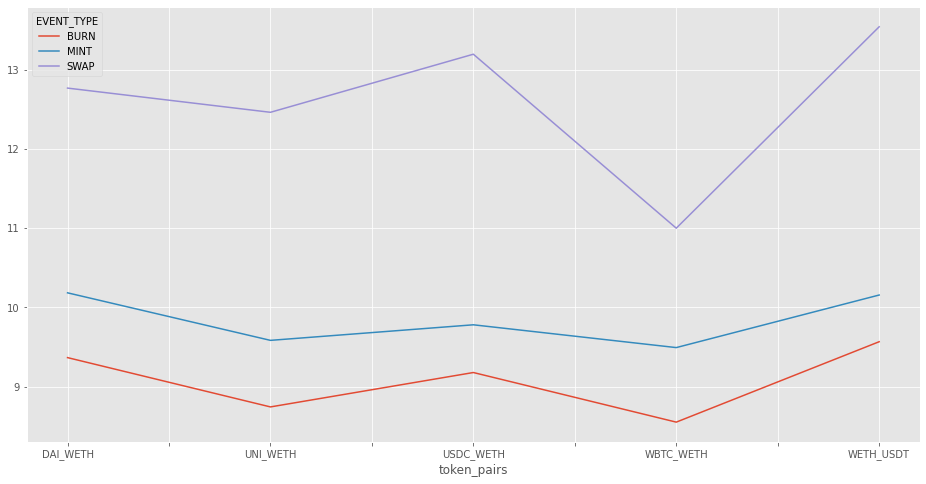

In [39]:
# Apply the log transformation to the concatenated data frame from part (iii), then plot the data using a bar chart with a figure size of (16, 8)
total_count.apply(np.log).plot(figsize=(16,8))

<hr style="border: 20px solid black">

<h1>Question 4 (25 points)</h1>
<br>
<font size="+1">
    <ul>
        <li>Background on defining prices in Uniswap v2:</li>
        <br>
        <ul>
            <li>We can use our swaps data set to define a <i>pool price</i> of one coin in terms of another coin, which is really an exchange rate between two coins.</li>
            <br>
            <li>Specifically, the pool price of one coin 0 in terms of another coin 1 is the ratio of the amount of coin 1 removed (out) from the Uniswap pool relative to the amount of coin 0 deposited (in) the pool, that is $$\frac{\text{amount coin 1 out}}{\text{amount coin 0 in}}.$$</li>
            <br>
            <ul>
                <li>For example, in the Ethereum - USD Coin pool <i>(USDC_WETH)</i>, you can calculate the pool price of Ethereum in terms of USD Coin by computing the ratio $$\frac{\text{amount USDC out}}{\text{amount WETH in}}.$$</li>
                <br>
            </ul>
            <li>We want to investigate the price of Ethereum in terms of three stable coins, which are supposed to track the U.S. Dollar.</li>
            <br>
        </ul>
    </ul>
    <ol>
        <li type='i'>Using the swaps data set, compute the <b>daily average</b> pool price (defined above) of Ethereum (WETH) in terms of USD Coin (USDC), Tether (USDT), and <a href="https://www.kraken.com/en-us/learn/what-is-dai">DAI</a> stable coins.</li>
        <ul>
            <li><i>Hint: you should filter the swaps data set according to each token pair that you are interested in computing a pool price for, then compute the pool price (defined above), and finally group by the date and apply the mean method.</i></li>
            <br>
        </ul>
        <li type='i'>For each daily average pool price series, you should replace any infinity values with nulls, and then drop all nulls.</li>
        <ul>
            <li><i>Hint: this can be done using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html">replace()</a> (where you want to replace np.inf and -np.inf with np.nan) and <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html">dropna()</a> method.</i></li>
            <br>
        </ul>
        <li type='i'>Concatenate the three pool price time series horizontally and drop any nulls that occur from the concatenation.</li>
        <br>
        <li type='i'>Finally, plot the three pool price time series in the same figure with a figure size of (16,8) and with a legend consisting of the labels ['USDC/ETH', 'USDT/ETH', 'DAI/ETH'].</li>
        <ul>
            <li><i>Hint: all three time series should be very similar since the stable coins are supposed to be equivalent.</i></li>
            <br>
            <li><i>Hint: You should produce a graph that looks something like this (though likely with a different format style).</i></li>
            <br>
            <img src="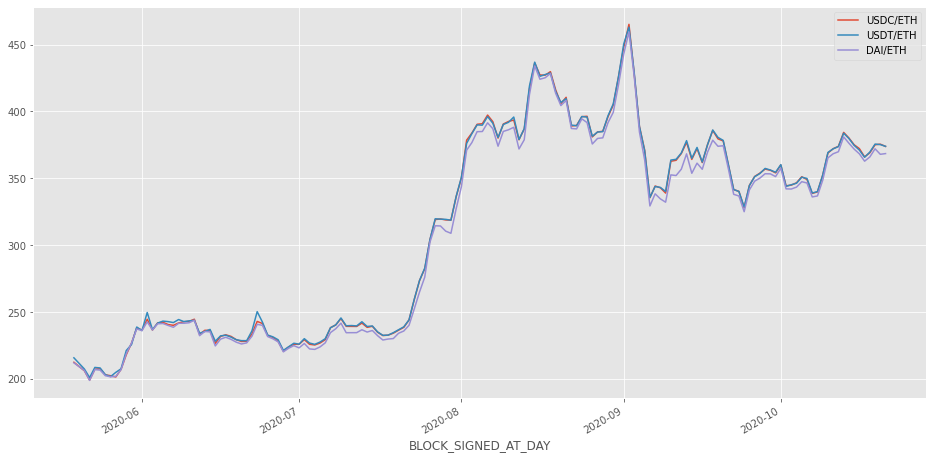
">
            <br>
        </ul>
    </ol>
</font>

In [60]:
coin1_out

BLOCK_SIGNED_AT_DAY
2020-05-06    1.200000e-02
2020-05-07    0.000000e+00
2020-05-11    2.048700e-01
2020-05-12    1.843444e+00
2020-05-13    4.227325e+00
                  ...     
2020-10-17    1.354402e+07
2020-10-18    9.336897e+06
2020-10-19    1.428653e+07
2020-10-20    2.228348e+07
2020-10-21    1.897463e+07
Name: AMOUNT0_OUT, Length: 166, dtype: float64

In [113]:
# compute the daily average pool price of WETH with USDC,USDT,DAI
is_in_filter = swaps["token_pairs"].isin(["USDC_WETH","DAI_WETH","WETH_USDT"])
ETH_swaps = swaps.loc[is_in_filter]
ETH_swaps["price ratio"] = ETH_swaps["AMOUNT0_OUT"]/ETH_swaps["AMOUNT1_IN"]
aveg_price_ratio = ETH_swaps.groupby("BLOCK_SIGNED_AT_DAY")["price ratio"].mean()
ETH_swaps.set_index("BLOCK_SIGNED_AT_DAY",inplace=True)
ETH_swaps["aveg price"] = aveg_price_ratio
ETH_swaps["aveg price"].replace(np.inf,np.nan,inplace=True)
ETH_swaps["aveg price"].replace((-np.inf),np.nan,inplace=True)
ETH_swaps["aveg price"].dropna(inplace=True)
ETH_swaps


/var/folders/w6/xsxq5y590vxbypnzr0z3j9zc0000gn/T/ipykernel_84938/2061651120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ETH_swaps["price ratio"] = ETH_swaps["AMOUNT0_OUT"]/ETH_swaps["AMOUNT1_IN"]
/var/folders/w6/xsxq5y590vxbypnzr0z3j9zc0000gn/T/ipykernel_84938/2061651120.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ETH_swaps["aveg price"] = aveg_price_ratio
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,ADDRESS_FROM,ADDRESS_TO,AMOUNT0_IN,AMOUNT0_OUT,AMOUNT1_IN,AMOUNT1_OUT,BLOCK_HEIGHT,BLOCK_SIGNED_AT,EVENT_TYPE,POOL_ADDRESS,...,TOKEN_0_NAME,TOKEN_0_TICKER_SYMBOL,TOKEN_1,TOKEN_1_DECIMALS,TOKEN_1_NAME,TOKEN_1_TICKER_SYMBOL,TX_HASH,token_pairs,price ratio,aveg price
BLOCK_SIGNED_AT_DAY,,,,,,,,,,,,,,,,,,,,,
2020-05-06,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x8688a84fcfd84d8f78020d0fc0b35987cc58911f,0.000000,0.00100,0.000005,0.000000,10008566,2020-05-06 04:09:32+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x932cb88306450d481a0e43365a3ed832625b68f036e9...,USDC_WETH,205.176618,202.924786
2020-05-06,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x11e4857bb9993a50c685a79afad4e6f65d518dda,0.000000,0.01000,0.000049,0.000000,10008585,2020-05-06 04:12:35+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x697b7aaca56a80a8d3a2f560ed7f1ecb97c22b2edd6e...,USDC_WETH,202.919065,202.924786
2020-05-06,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x8688a84fcfd84d8f78020d0fc0b35987cc58911f,0.000000,0.00100,0.000005,0.000000,10013764,2020-05-06 23:24:55+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x43b6bfd06dde0814fe9c1b63ce98ec4c67c72d96169d...,USDC_WETH,200.678676,202.924786
2020-05-07,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x12ede161c702d1494612d19f05992f43aa6a26fb,0.000689,0.00000,0.000000,0.000003,10014418,2020-05-07 01:51:12+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x735cf98e86a5df67b6a837ae50de1d7a589d9f6baaf0...,USDC_WETH,NaN,NaN
2020-05-11,0x57ead0a9f49fafdd2447f615b036f3c316af5171,0x57ead0a9f49fafdd2447f615b036f3c316af5171,0.000000,0.20487,0.001000,0.000000,10045107,2020-05-11 20:08:48+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x840bb5ab0a779b4f733443651ac54dabe24e243c3606...,USDC_WETH,204.870000,204.870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,751.977882,0.00000,0.000000,1.951459,11099999,2020-10-21 21:13:38+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x5f21db0611273e24f41a4688b3a7074699196e47a095...,USDC_WETH,NaN,NaN
2020-10-21,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xc113eb450a2e82d6800ca096caf5e7c0d5809de8,0.000000,1000.00000,2.610745,0.000000,11099999,2020-10-21 21:13:38+00:00,SWAP,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,...,USD Coin,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,18,Wrapped Ether,WETH,0x77df87ad0af66bc282b04462a01259f90a58f2023734...,USDC_WETH,383.032454,NaN
2020-10-21,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x04b936745c02e8cb75cc68b93b4fb99b38939d5d,0.653051,0.00000,0.000000,250.000000,11100000,2020-10-21 21:13:40+00:00,SWAP,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,...,Wrapped Ether,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,6,Tether USD,USDT,0x4f619fc5baf7055348550496b4fb8734cf5660b78e73...,WETH_USDT,NaN,NaN


In [127]:
USDC_WETH = ETH_swaps.loc[ETH_swaps["token_pairs"]=="USDC_WETH"]["aveg price"].dropna()
USDC_ETH =  USDC_WETH.groupby("BLOCK_SIGNED_AT_DAY").mean()
USDC_ETH

BLOCK_SIGNED_AT_DAY
2020-05-06    202.924786
2020-05-11    204.870000
2020-05-12    156.931615
2020-05-13     99.861380
2020-05-14    222.452946
                 ...    
2020-10-14    184.471237
2020-10-16    178.213818
2020-10-18    188.842635
2020-10-19    191.193873
2020-10-20    194.580367
Name: aveg price, Length: 157, dtype: float64

In [128]:
DAI_WETH = ETH_swaps.loc[ETH_swaps["token_pairs"]=="DAI_WETH"]["aveg price"].dropna()
DAI_ETH = DAI_WETH.groupby("BLOCK_SIGNED_AT_DAY").mean()
DAI_ETH

BLOCK_SIGNED_AT_DAY
2020-05-14    222.452946
2020-05-15    210.147475
2020-05-16    252.892707
2020-05-17    195.620819
2020-05-18    196.311500
                 ...    
2020-10-14    184.471237
2020-10-16    178.213818
2020-10-18    188.842635
2020-10-19    191.193873
2020-10-20    194.580367
Name: aveg price, Length: 153, dtype: float64

In [129]:
WETH_USDT = ETH_swaps.loc[ETH_swaps["token_pairs"]=="WETH_USDT"]["aveg price"].dropna()
ETH_USDT = WETH_USDT.groupby("BLOCK_SIGNED_AT_DAY").mean()
ETH_USDT

BLOCK_SIGNED_AT_DAY
2020-05-19    212.128114
2020-05-20    210.681140
2020-05-21    206.148539
2020-05-22    195.662709
2020-05-23    201.566353
                 ...    
2020-10-14    184.471237
2020-10-16    178.213818
2020-10-18    188.842635
2020-10-19    191.193873
2020-10-20    194.580367
Name: aveg price, Length: 148, dtype: float64

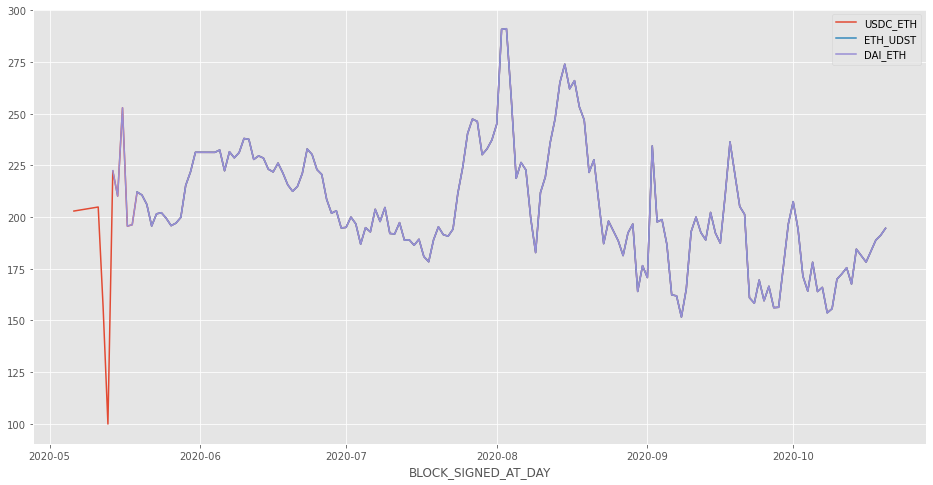

In [138]:
three = pd.DataFrame({"USDC_ETH":USDC_ETH,"ETH_UDST":ETH_USDT,"DAI_ETH":DAI_ETH}).plot(figsize=(16,8))
